In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import find_circle_intersections

%matplotlib inline

#### Simple visualization

In [2]:
def plot_intersection(x1, y1, r1, x2, y2, r2, *, ymax=None, xmax=None, circles=False):
    if circles:
        c1 = plt.Circle((x1, y1), r1, color='g', fill=False)
        c2 = plt.Circle((x2, y2), r2, color='g', fill=False)
        plt.gca().add_patch(c1)
        plt.gca().add_patch(c2)
    try:
        ix1, iy1, ix2, iy2 = find_circle_intersections(x1, y1, r1, x2, y2, r2)
    except ValueError:
        print("no intersection")
        return

    if xmax is None and ymax is None:
        plt.plot([ix1, ix2], [iy1, iy2], 'mo')
        return ix1, iy1, ix2, iy2

    elif ymax is not None:
        yi = np.argmax([iy1, iy2]) if ymax else np.argmin([iy1, iy2])
        x, y = [ix1, ix2][yi], [iy1, iy2][yi]
    else:
        xi = np.argmax([ix1, ix2]) if xmax else np.argmin([ix1, ix2])
        x, y = [ix1, ix2][xi], [iy1, iy2][xi]

    plt.plot([x], [y], 'mo')
    return x, y

def draw_leg(c, p, lengths, angle=np.pi/3*4):
    assert len(lengths) == 11, "lengths must have length 11"

    plt.figure(figsize=(4, 6))

    # first circle
    r = lengths[0]
    x0, y0 = c[0]+r*np.cos(angle), c[1]+r*np.sin(angle)

    # 1-3 intersection
    x13, y13 = plot_intersection(x0, y0, lengths[1], p[0], p[1], lengths[3], ymax=True)
    plt.plot([x0, x13, p[0]], [y0, y13, p[1]], 'g-')

    # 2-4 intersection
    x24, y24 = plot_intersection(x0, y0, lengths[2], p[0], p[1], lengths[4], ymax=False)
    plt.plot([x0, x24, p[0]], [y0, y24, p[1]], 'g-')

    # 5-6 intersection
    x56, y56 = plot_intersection(x13, y13, lengths[5], p[0], p[1], lengths[6], xmax=False)
    plt.plot([x13, x56, p[0]], [y13, y56, p[1]], 'g-')

    # 7-8 intersection
    x78, y78 = plot_intersection(x56, y56, lengths[8], x24, y24, lengths[7], xmax=False)
    plt.plot([x56, x78, x24], [y56, y78, y24], 'g-')

    # 9-10 intersection
    x, y = plot_intersection(x78, y78, lengths[9], x24, y24, lengths[10], ymax=False)
    plt.plot([x78, x, x24], [y78, y, y24], 'g-')

    c1 = plt.Circle(c, lengths[0], color='g', fill=False)
    plt.gca().add_patch(c1)

    plt.plot([c[0], p[0]], [c[1], p[1]], 'ro')
    plt.plot([x0], [y0], 'go')

    plt.xlim(0, c[0]+lengths[0])
    plt.ylim(0, c[1]+lengths[0]*2)

    plt.show()

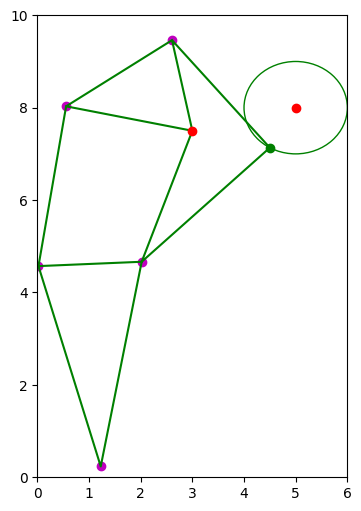

In [3]:
c = (5, 8)
p = (3, 7.5)
lengths = [1, 3, 3.5, 2, 3, 2.5, 2.5, 2, 3.5, 4.5, 4.5]
draw_leg(c, p, lengths)

#### With the holy numbers

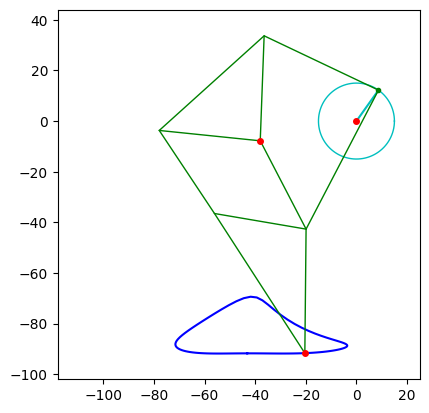

In [4]:
from beest import calculate_joints, get_holy_numbers
from plot_utils import get_plot_data, plot_leg

o, p, links = get_holy_numbers()
# joints = calculate_joints(o, p, links, np.pi/3)
# _, _, min_x, max_x, min_y, max_y = get_plot_data([joints])

pts = []
for angle in np.linspace(0, 2*np.pi, 100):
    try:
        pts.append(calculate_joints(o, p, links, angle))
    except ValueError as e:
        print(f"failed at angle {angle} with {e}")
        break

st_path, ee_path, min_x, max_x, min_y, max_y = get_plot_data(pts)
joints = pts[15]

fig, ax = plt.subplots()
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_aspect('equal')

plot_leg(ax, o, p, joints, st_path, ee_path)

plt.show()


In [5]:
ee_path.shape

(100, 2)